In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# import data
infile = '../../kuroshio_productivity/data/jma_nitrate.csv'
data = pd.read_csv(infile, sep=',')

data.columns

subset = data[data.nitrate>=0]


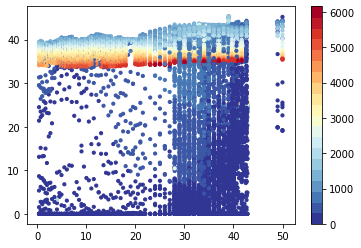

In [3]:
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

palette = plt.get_cmap('RdYlBu_r', 20 )

plt.scatter(subset.lat, subset.nitrate, s = 10, c = subset.depth, cmap = palette)
plt.colorbar()

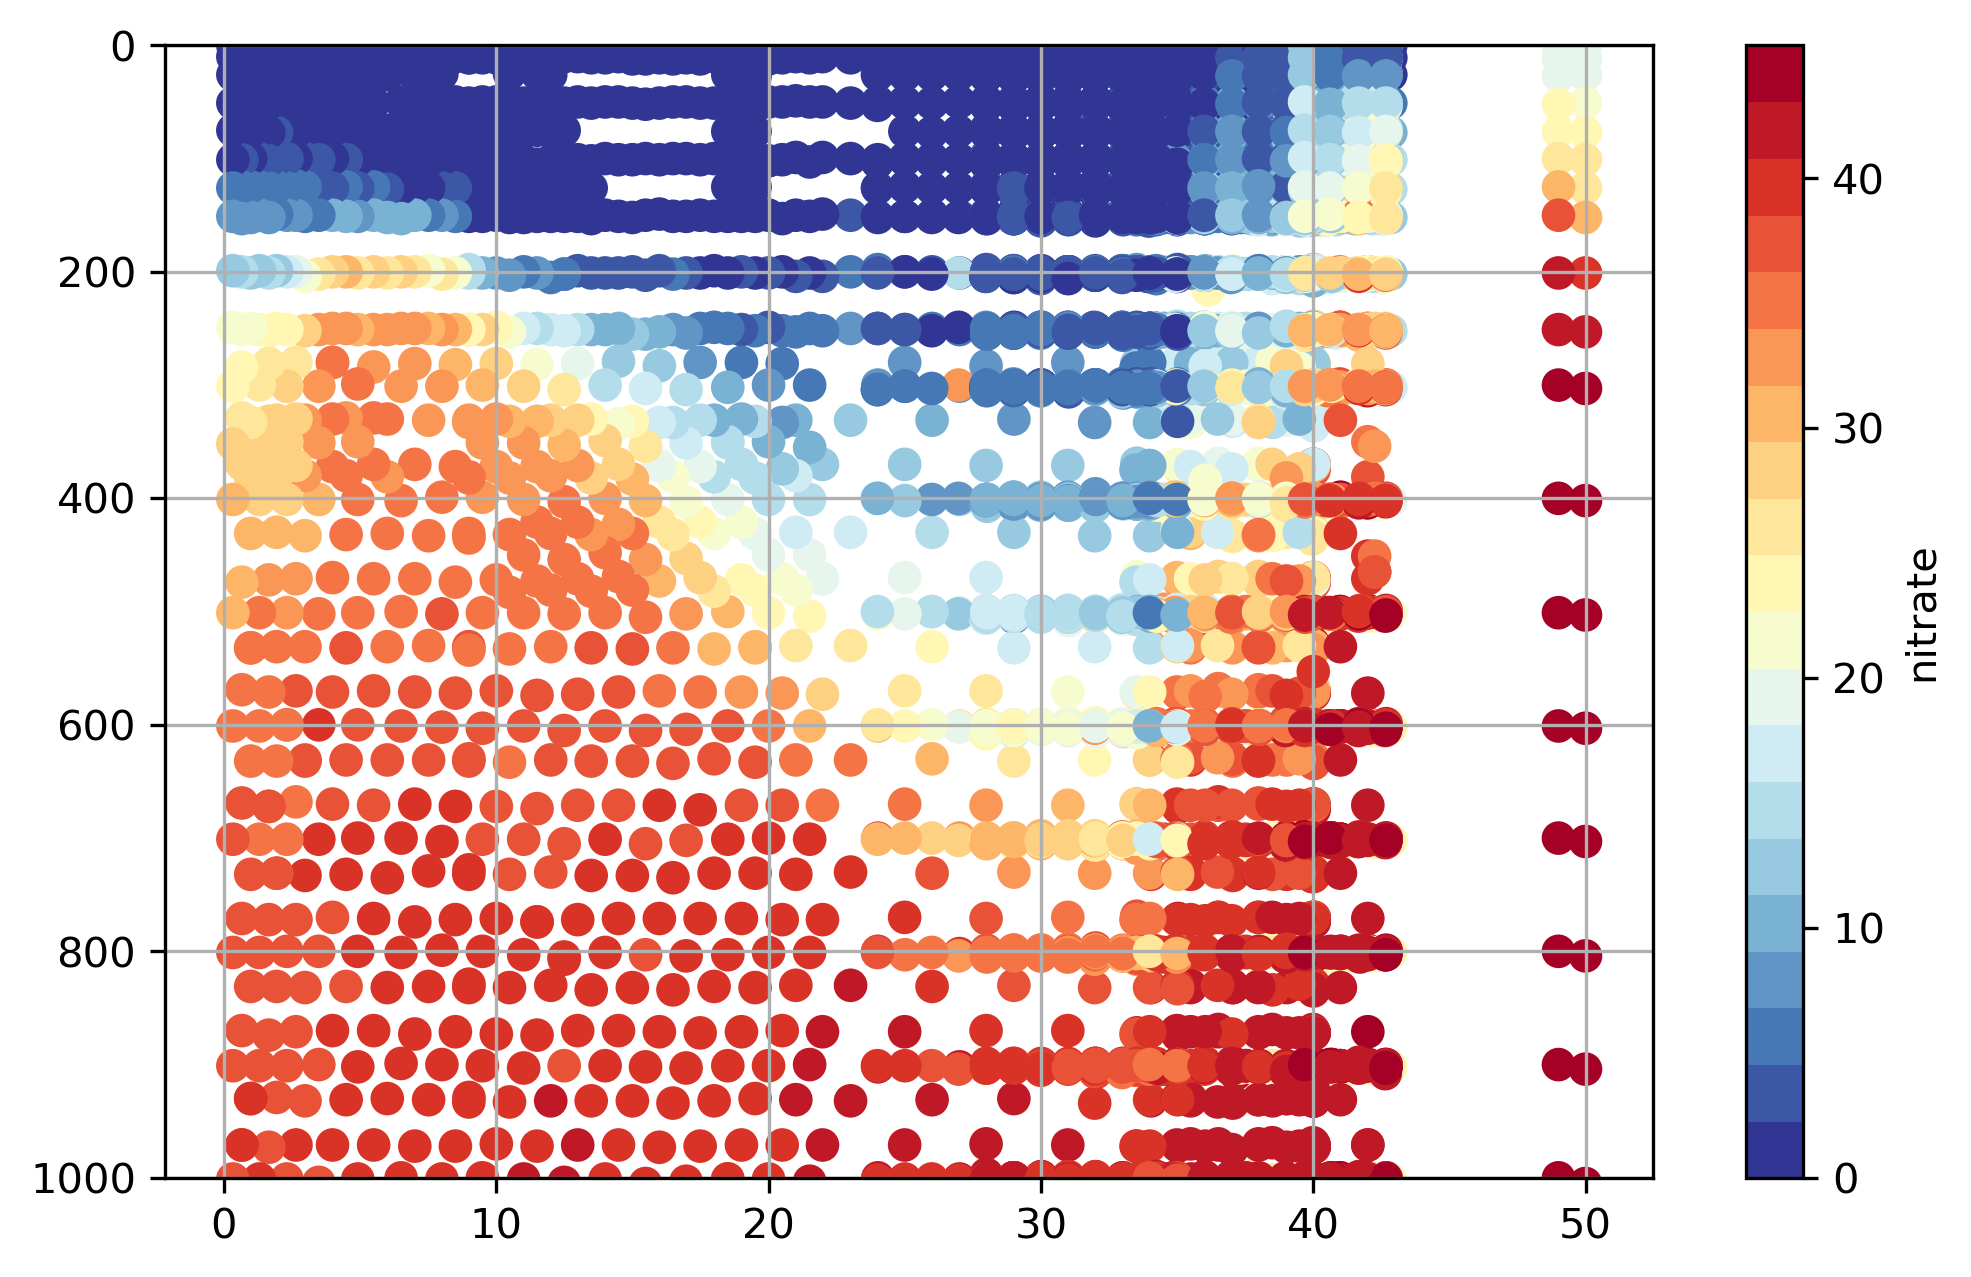

In [4]:
fig = plt.figure(figsize = (8,5), dpi = 300)
plt.scatter(subset.lat, subset.depth, s = 50, c = subset.nitrate, cmap = palette)
plt.ylim([0, 1000])
plt.gca().invert_yaxis()
plt.grid('True')
cb = plt.colorbar()
cb.set_label('nitrate')

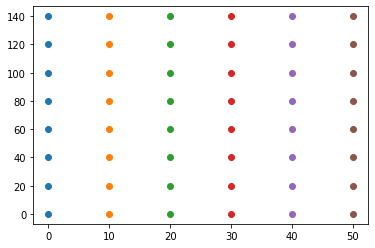

In [63]:
# need to bin the data into a grid to contour it

# make a grid
x = np.arange(0, 55, 10.)
y = np.arange(0, 151, 20.)

xx, yy = np.meshgrid(x, y)

h = plt.plot(xx, yy, 'o')
plt.show()

In [64]:
# bin the data into the grid

import scipy.stats as ss
binned_nit = ss.binned_statistic_2d(subset.lat, subset.depth, subset.nitrate, statistic='mean', bins=[x, y])

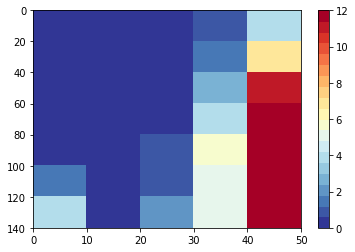

In [67]:
# plot the binned data

XX, YY = np.meshgrid(binned_nit.x_edge, binned_nit.y_edge)

plt.pcolormesh(XX, YY, binned_nit.statistic.T, vmin = 0, vmax = 12, cmap = palette)
cb = plt.colorbar()

plt.gca().invert_yaxis()

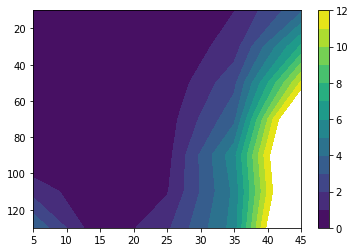

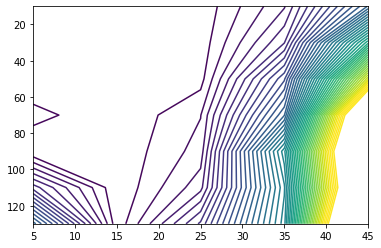

In [66]:
# to do a contour plot, you need to reference the center of the bins, not the edges
# get the bin centers
xc = (x[:-1] + x[1:]) / 2
yc = (y[:-1] + y[1:]) / 2

plt.contourf(xc, yc, binned_nit.statistic.T, levels = np.arange(0, 13, 1),vmin = 0, vmax = 12)
cb = plt.colorbar()

plt.gca().invert_yaxis()
plt.show()

plt.contour(xc, yc, binned_nit.statistic.T, levels = np.arange(0, 13, 0.25),vmin = 0, vmax = 12)

plt.gca().invert_yaxis()
plt.show()